## load Mnist data

In [5]:
import numpy as np
import struct
def load_images(file_name):
    binfile = open(file_name, 'rb') 
    buffers = binfile.read()
    magic,num,rows,cols = struct.unpack_from('>IIII',buffers, 0)
    bits = num * rows * cols
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    binfile.close()
    images = np.reshape(images, [num, rows * cols])
    return images
def load_labels(file_name):
    binfile = open(file_name, 'rb')  
    buffers = binfile.read()
    magic,num = struct.unpack_from('>II', buffers, 0) 
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    binfile.close()
    labels = np.reshape(labels, [num])
    return labels  
filename_train_images ='./dataset/train-images.idx3-ubyte'
filename_train_labels ='./dataset/train-labels.idx1-ubyte'
filename_test_images ='./dataset/t10k-images.idx3-ubyte'
filename_test_labels ='./dataset/t10k-labels.idx1-ubyte'
X_train=load_images(filename_train_images)
y_train=load_labels(filename_train_labels)
X_test=load_images(filename_test_images)
y_test=load_labels(filename_test_labels)

In [6]:
X_train[0].shape #(784,) 28x28 image
print(len(X_train), len(y_train))
X_train.shape
# print(len(X_test),len(y_test))
# print(X_train[0],y_train[0])

60000 60000


(60000, 784)

## visualization image

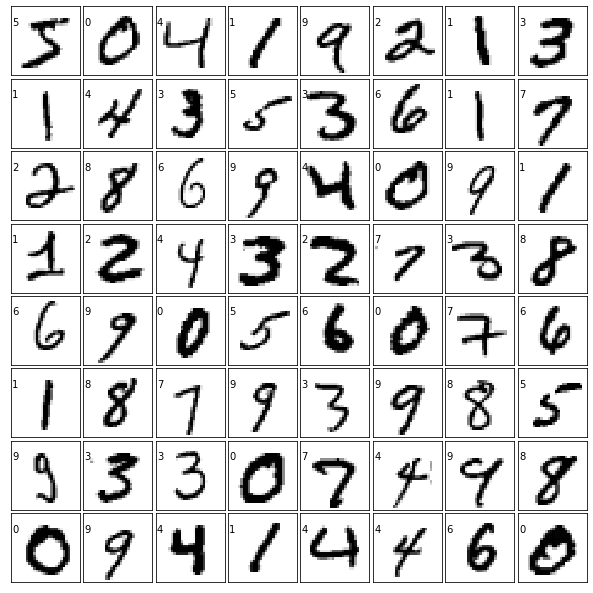

In [4]:
#visualize train image
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    #show first 64 image(including images and labels)
    images = np.reshape(X_train[i], [28,28])
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(images,cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(y_train[i]))

plt.show()

## PCA dimension reduction

In [7]:
from sklearn.decomposition import PCA 
#random PCA
randomized_pca = PCA(n_components=2,svd_solver='randomized')
reduced_data_rpca = randomized_pca.fit_transform(X_train.data)
#PCA
pca = PCA(n_components = 2) #reduce 28x28 into 2 dimension
reduced_data_pca = pca.fit_transform(X_train.data)

print(reduced_data_pca.shape)
print(reduced_data_rpca[0])
print(reduced_data_pca[0])

(60000, 2)
[ 123.93557028 -312.67289671]
[ 123.93566864 -312.67509143]


5923 5923 0
6742 6742 1
5958 5958 2
6131 6131 3
5842 5842 4
5421 5421 5
5918 5918 6
6265 6265 7
5851 5851 8
5949 5949 9


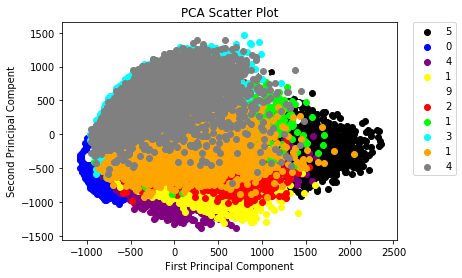

In [8]:
# visualize PCA processed result
import matplotlib.pyplot as plt
colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray'] # corresponding to 0-9
for i in range (len(colors)):
    # to show how many different number in entire train dataset
    # we have reduce the dimension into 2 before, so we can use [x,y] to represent a number
    x = reduced_data_rpca[:,0][y_train == i]
    y = reduced_data_rpca[:,1][y_train == i]
    print(len(x), len(y), i) # show how many number in processed dataset
    plt.scatter(x,y,c=colors[i])
plt.legend(y_train, bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Compent')
plt.title("PCA Scatter Plot")
plt.show()

## SVM Classifier

In [9]:
## linear SVC
from sklearn import svm
# one vs the rest multi classification
svc_model = svm.SVC(kernel='linear',decision_function_shape='ovr')
#because the data is too large to compute, we use PCA dimension reduction first
reduced_X_train = pca.fit_transform(X_train.data)
reduced_X_test = pca.fit_transform(X_test.data)
print('begin training')
svc_model.fit(reduced_X_train,y_train)

In [ ]:
predicted = svc_model.predict(reduced_X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test,predicted))

## Logistic regression

In [18]:
#PCA dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
reduced_X_train = pca.fit_transform(X_train.data)
reduced_X_test = pca.fit_transform(X_test.data)

In [19]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l2')
lg_model.fit(reduced_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn import metrics
predicted = lg_model.predict(reduced_X_test)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test,predicted))

precision    recall  f1-score   support

           0       0.74      0.83      0.78       980
           1       0.02      0.01      0.02      1135
           2       0.11      0.12      0.11      1032
           3       0.04      0.05      0.04      1010
           4       0.03      0.03      0.03       982
           5       0.50      0.37      0.42       892
           6       0.13      0.13      0.13       958
           7       0.01      0.02      0.02      1028
           8       0.39      0.36      0.38       974
           9       0.01      0.00      0.01      1009

    accuracy                           0.19     10000
   macro avg       0.20      0.19      0.19     10000
weighted avg       0.19      0.19      0.19     10000

[[818   0  14   1   4  23  91   4  25   0]
 [  0  13   1   0 378   0   0 717   0  26]
 [ 68   5 124   3 243  18 389  51  57  74]
 [ 11  14   7  54  63  55   8 420  50 328]
 [ 12 127 181 199  25  46 190   7 194   1]
 [ 67   7  26 130  58 327  19 151  55  5